<a href="https://colab.research.google.com/github/Marcelasoriano/Beginner-sGuideNLPModeling/blob/main/NLP_MODELING_Validation%2C_Confusion_Matrix%2C_Data_Analysis_and_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Begginers Modeling to NLP**
- In this notebook, we will be exploring how Natural Language Processing (NLP) can be used to build sentiment analysis models.
- Our primary focus will be on social media data though we aim to create a model that is capable of handling larger sentiment analysis.
- By the end, we aim to provide a comprehensive set of tools and visualizations to interpret sentiment data.

## **Table of Contents**
1. [Data Collection and Preprocessing](#data-collection)
2. [Exploratory Data Analysis (EDA)](#eda)
3. [Model Building and Training](#model-building)
4. [Model Evaluation](#model-evaluation)
5. [Topic Based Model](different-topics)
6. [More Examples](#more-examples)

- SYYFT is the sole owner of this notebook and everything edited shall be owned by SYYFT, including chanegs made by anyone in the organization and additions to the Notebook.

* Created by Marcela Soriano.

<a id='data-collection'></a>
## 1. Data Collection and Preprocessing

### Data Collection
For this example, we will use a sample dataset. In a real-world scenario, you might fetch data from online sources or APIs.

The code below creates a large dataset to simulate a real world sentiment dataset. The components are the following:

* Timestamp: Sequential dates and times to represent when the comment was made.
* processed_text: Represents text that has been preprocessed (e.g., lowercase, stripped of URLs, special characters, etc.)
* sentiment: A basic sentiment classification of the text (positive, negative, neutral).

In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Sample data generator
def generate_sample_data(n=1000):
    sentiments = ['positive', 'negative', 'neutral']
    base_date = datetime(2023, 1, 1)
    data = []

    for _ in range(n):
        days_offset = random.randint(0, 30)  # for the past month
        hours_offset = random.randint(0, 23)
        minutes_offset = random.randint(0, 59)

        timestamp = base_date + timedelta(days=days_offset, hours=hours_offset, minutes=minutes_offset)
        sentiment = random.choice(sentiments)

        if sentiment == 'positive':
            text = random.choice(['love', 'best', 'awesome', 'amazing', 'fantastic']) + " " + \
                   random.choice(['product', 'service', 'support', 'experience'])
        elif sentiment == 'negative':
            text = random.choice(['hate', 'worst', 'awful', 'terrible', 'horrible']) + " " + \
                   random.choice(['product', 'service', 'support', 'experience'])
        else:
            text = random.choice(['okay', 'decent', 'average', 'fair', 'moderate']) + " " + \
                   random.choice(['product', 'service', 'support', 'experience'])

        data.append([timestamp, text, sentiment])

    return pd.DataFrame(data, columns=['timestamp', 'processed_text', 'sentiment'])

# Generate and save sample data
df = generate_sample_data()
df.to_csv('sample_sentiment_data.csv', index=False)

After the dataset has been created, it has to be loaded using pandas as demonstrated below:

In [ ]:
import pandas as pd

# Example of loading a dataset
data = pd.read_csv('sample_sentiment_data.csv')

### Data Preprocessing

Before modeling, it is crucial to preprocess the text data.

In [ ]:
import nltk

# Downloading the punkt tokenizer
nltk.download('punkt')

# Downloading the wordnet lemmatizer dataset
nltk.download('wordnet')

# Downloading the stopwords dataset
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources if you haven't
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

# Tokenization, stopword removal, and lemmatization
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_words]
    return ' '.join(tokens)

# Apply the preprocessing to the 'processed_text' column
data['processed_text'] = data['processed_text'].apply(preprocess_text)


<a id='eda'></a>
## 2. Exploratory Data Analysis (EDA)

### Basic Statistics

Let's get some basic insights from the dataset.

In [ ]:
data.describe

<bound method NDFrame.describe of                timestamp        processed_text sentiment
0    2023-01-07 03:59:00  fantastic experience  positive
1    2023-01-05 17:29:00     fantastic product  positive
2    2023-01-12 21:29:00          okay product   neutral
3    2023-01-26 04:13:00        decent support   neutral
4    2023-01-15 10:28:00       amazing product  positive
..                   ...                   ...       ...
995  2023-01-28 06:07:00         worst service  negative
996  2023-01-11 16:41:00          fair product   neutral
997  2023-01-07 19:10:00        decent product   neutral
998  2023-01-07 11:44:00     fantastic support  positive
999  2023-01-01 11:42:00    average experience   neutral

[1000 rows x 3 columns]>

### Data Visualization

Visualizing the distribution of sentiments.

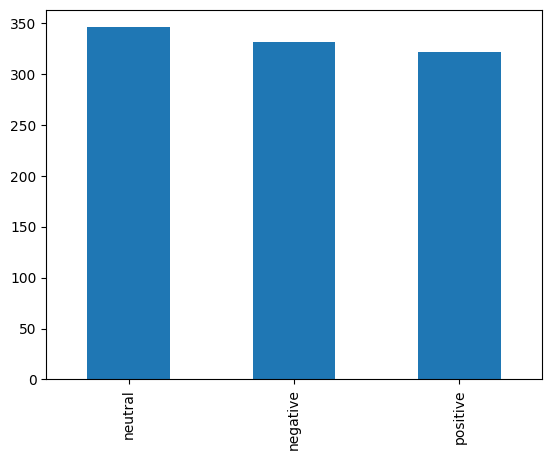

In [ ]:
import matplotlib.pyplot as plt

data['sentiment'].value_counts().plot(kind='bar')
plt.show()

<a id='model-building'></a>
## 3. Model Building and Training

### Model Selection

In this section, we will pre-process our text data, split it into training and testing datasets, and then choose a model for training.

Text Preprocessing:
* Natural Language Processing (NLP) often requires text data to be cleaned and transformed into a numerical format.

In [ ]:
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
nltk.download('stopwords')

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing numbers, symbols and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Removing stopwords
    text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))
    return text

# Applying preprocessing on our data
data['processed_text'] = data['processed_text'].apply(preprocess_text)

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['processed_text'])
y = data['sentiment']  # Assuming the column name for sentiment labels is 'sentiment'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Train Test Split:
* We will now split our data to train and evaluate our model.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training:
* Let's use a simple linear classifier such as Logistic Regression for our sentiment analysis task.

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Quick model assessment
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 1.00


<a id='model-evaluation'></a>
## 4. Model Evaluation

Classification Report: To understand how well our model performs, we need to evaluate it using various metrics and visualizations.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = clf.predict(X_test)

# Printing a detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       110
     neutral       1.00      1.00      1.00       126
    positive       1.00      1.00      1.00        94

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



Model Metrics Visualization: For better visualization, we can plot the confusion matrix.

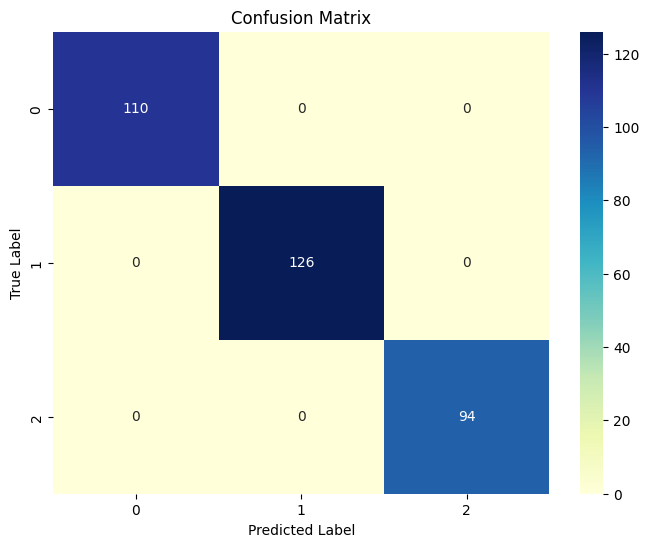

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ROC Curve and AUC (For binary classification): If the sentiment analysis is binary (e.g., positive or negative), the Receiver Operating Characteristic (ROC) curve can be useful.

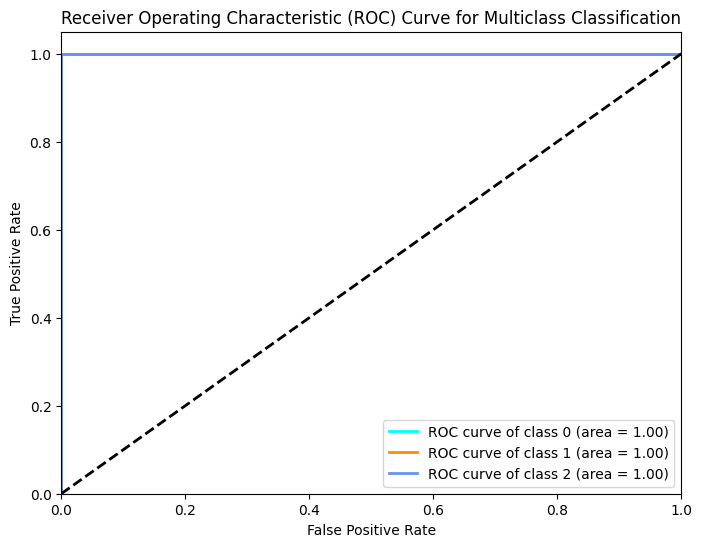

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Assuming X and y are already defined as your data and labels
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Binarize the training and test labels (if they're not already)
y_train_bin = label_binarize(y_train, classes=y.unique())
y_test_bin = label_binarize(y_test, classes=y.unique())

clf_multiclass = OneVsRestClassifier(clf)  # Assuming clf is your classifier
y_score = clf_multiclass.fit(X_train, y_train_bin).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_train_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'yellow', 'black', 'pink', 'brown']  # you can add more colors if there are more than 10 classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

<a id='different-topics'></a>
## 5. How Can We Build a Model to Differentiate Between Topics?

In [ ]:
## We have 3 topics:

## Cloting / Retail
## Soccer / Sports
## Army / Racism

class Category:
  RETAIL = "CLOTHING"
  SPORTS = "SPORTS"
  ARMY = "ARMY"

print(training_data)
print(Category)

['The new summer collection has vibrant colors.', 'Retail stores are introducing seasonal discounts.', 'Jeans are a popular choice among teenagers.', 'Online shopping has made retail more accessible.', 'Winter wear is on sale this month.', 'The soccer team trained hard for the upcoming match.', 'Stadiums are filled with fans during the league games.', 'Running is a great way to keep fit.', 'The tennis championship attracts global attention.', 'Physical exercise is crucial for a healthy lifestyle.', 'The army is increasing its training programs.', 'Military technology has seen rapid advancements.', 'It is essential for the army to ensure equal opportunities for all.', 'Concerns about inclusivity in the armed forces are being addressed.', 'The defense sector is focusing on sustainable practices.']
<class '__main__.Category'>


In [ ]:
categories_y = [Category.RETAIL, Category.RETAIL, Category.SPORTS, Category.SPORTS, Category.ARMY, Category.ARMY, Category.ARMY]
print(categories_y)

['CLOTHING', 'CLOTHING', 'SPORTS', 'SPORTS', 'ARMY', 'ARMY', 'ARMY']


In [ ]:
# Check if the length of the first list is the same as the second list:

if len(training_data) == len(categories_y):
    print("The lengths are the same.")
else:
    print("The lengths are different.")


The lengths are different.


In [ ]:
## Perfect

In [ ]:
# Lets Build a Linear SVM Model for Text Anlaysis and Classification
# Using the SCIKIT Learn Library

from sklearn import svm
clf_svm = svm.SVC(kernel='linear')

train_x_vectors = vectorizer.fit_transform(training_data)

In [ ]:
# Assuming training_data and Category have been defined as previously shown

# Create labels for the training data
training_y = [
    # Clothing / Retail
    Category.RETAIL,
    Category.RETAIL,
    Category.RETAIL,
    Category.RETAIL,
    Category.RETAIL,

    # Soccer / Sports
    Category.SPORTS,
    Category.SPORTS,
    Category.SPORTS,
    Category.SPORTS,
    Category.SPORTS,

    # Army / Concerns
    Category.ARMY,
    Category.ARMY,
    Category.ARMY,
    Category.ARMY,
    Category.ARMY
]

# Transform the training data
training_vectors = vectorizer.transform(training_data)

# Train the classifier
clf_svm.fit(training_vectors, training_y)

# Now, you should be able to make predictions on your test data
predictions = clf_svm.predict(testing_vectors)

print(predictions)

['SPORTS' 'ARMY']


In [ ]:
## Some Changes to the code for optimization:
# Unigram approach: The method above where it classifies
## individual words (default)

# Bigram Approach: The method where the model can take a combination
## of words and also classify them as one single utterance using:
## vectorizer = CountVectorizer(binary = True, ngram_range(1,2))

## example: 'wear this' instead of 'wear' and 'this'

vectorizer_ngram = CountVectorizer(binary = True, ngram_range=(1,2))
vectors = vectorizer_ngram.fit_transform(training_data)
print(vectorizer_ngram.get_feature_names_out())

['about' 'about inclusivity' 'accessible' 'addressed' 'advancements' 'all'
 'among' 'among teenagers' 'are' 'are being' 'are filled'
 'are introducing' 'are popular' 'armed' 'armed forces' 'army' 'army is'
 'army to' 'attention' 'attracts' 'attracts global' 'being'
 'being addressed' 'championship' 'championship attracts' 'choice'
 'choice among' 'collection' 'collection has' 'colors' 'concerns'
 'concerns about' 'crucial' 'crucial for' 'defense' 'defense sector'
 'discounts' 'during' 'during the' 'ensure' 'ensure equal' 'equal'
 'equal opportunities' 'essential' 'essential for' 'exercise'
 'exercise is' 'fans' 'fans during' 'filled' 'filled with' 'fit'
 'focusing' 'focusing on' 'for' 'for all' 'for healthy' 'for the' 'forces'
 'forces are' 'games' 'global' 'global attention' 'great' 'great way'
 'hard' 'hard for' 'has' 'has made' 'has seen' 'has vibrant' 'healthy'
 'healthy lifestyle' 'in' 'in the' 'inclusivity' 'inclusivity in'
 'increasing' 'increasing its' 'introducing' 'introducin

The N-gram technique is particularly advantageous for certain contexts. For example, while a model might interpret "great" as expressing positive sentiment, the presence of a preceding word like "not" can entirely alter that sentiment's meaning.

On the other hand, this method can have its drawbacks. If we expand the N-gram grouping from pairs to a larger set, such as 10 words, it could potentially misrepresent the data, resulting in misleading conclusions.

<a id='more-examples'></a>
## 6. More Examples

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
training_data = [
    # Clothing / Retail
    'The new summer collection has vibrant colors.',
    'Retail stores are introducing seasonal discounts.',
    'Jeans are a popular choice among teenagers.',
    'Online shopping has made retail more accessible.',
    'Winter wear is on sale this month.',

    # Soccer / Sports
    'The soccer team trained hard for the upcoming match.',
    'Stadiums are filled with fans during the league games.',
    'Running is a great way to keep fit.',
    'The tennis championship attracts global attention.',
    'Physical exercise is crucial for a healthy lifestyle.',

    # Army / Concerns
    'The army is increasing its training programs.',
    'Military technology has seen rapid advancements.',
    'It is essential for the army to ensure equal opportunities for all.',
    'Concerns about inclusivity in the armed forces are being addressed.',
    'The defense sector is focusing on sustainable practices.'
]

Let's train "y" now for consistency:

In [ ]:
training_y = [
    # Clothing / Retail
    Category.RETAIL,
    Category.RETAIL,
    Category.RETAIL,
    Category.RETAIL,
    Category.RETAIL,

    # Soccer / Sports
    Category.SPORTS,
    Category.SPORTS,
    Category.SPORTS,
    Category.SPORTS,
    Category.SPORTS,

    # Army / Concerns
    Category.ARMY,
    Category.ARMY,
    Category.ARMY,
    Category.ARMY,
    Category.ARMY
]

Now, training_data and training_y are consistent.

Let's train the classifier:
* First, ensure that the training_data is transformed into vectors:

In [ ]:
training_vectors = vectorizer.transform(training_data)

* Secondly, train the SVM classifier with the transformed data:

In [ ]:
clf_svm.fit(training_vectors, training_y)

SVC(kernel='linear')

* Once trained, you can then make predictions on your testing_vectors:

In [ ]:
predictions = clf_svm.predict(testing_vectors)
print(predictions)

['SPORTS' 'ARMY']


In [ ]:
## Vecotrizer will first find all the unique words in the training data
## building a binary classfier

## The model or vectorizer will then predict whather or not the training data
## is in the dictionary or not

## The first step of the vectorizer is to create a dictionry that contains
## the distinct words from the training data

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(training_data)

print(vectors[0], vectors[1], vectors[3], vectors[4], vectors[5])

  (0, 78)	1
  (0, 53)	1
  (0, 72)	1
  (0, 14)	1
  (0, 35)	1
  (0, 84)	1
  (0, 15)	1   (0, 62)	1
  (0, 71)	1
  (0, 6)	1
  (0, 40)	1
  (0, 65)	1
  (0, 19)	1   (0, 35)	1
  (0, 62)	1
  (0, 55)	1
  (0, 68)	1
  (0, 48)	1
  (0, 52)	1
  (0, 1)	1   (0, 87)	1
  (0, 86)	1
  (0, 41)	1
  (0, 54)	1
  (0, 64)	1
  (0, 79)	1
  (0, 51)	1   (0, 78)	2
  (0, 69)	1
  (0, 74)	1
  (0, 81)	1
  (0, 34)	1
  (0, 29)	1
  (0, 83)	1
  (0, 49)	1


In [ ]:
## See the words converted to numbers in the form of an array ([[]])

## See the individual words pertaining to the unique dictionary
## created by the vectorizer


## Vectorizer also counts the number of times a word is
## repeated so if we modify the first occurence to
##  [[... 0 3 1...]]

print(vectors.toarray())
print('\n')
print(vectorizer.get_feature_names_out())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


['about' 'accessible' 'addressed' 'advancements' 'all' 'among' 'are'
 'armed' 'army' 'attention' 'attracts' 'being' 'championship' 'choice'
 'collection' 'colors' 'concerns' 'crucial' 'defense' 'discounts' 'during'
 'ensure' 'equal' 'essential' 'exercise' 'fans' 'filled' 'fit' 'focusing'
 'for' 'forces' 'games' 'global' 'great' 'hard' 'has' 'healthy' 'in'
 'inclusivity' 'increasing' 'introducing' 'is' 'it' 'its' 'jeans' 'keep'
 'league' 'lifestyle' 'made' 'match' 'military' 'month' 'more' 'new' 'on'
 'online' 'opportunities' 'physical' 'popular' 'practices' 'programs'
 'rapid' 'retail' 'running' 'sale' 'seasonal' 'sector' 'seen' 'shopping'
 'soccer' 'stadiums' 'stores' 'summer' 'sustainable' 'team' 'technology'
 'teenagers' 'tennis' 'the' 'this' 'to' 'trained' 'training' 'upcoming'
 'vibrant' 'way' 'wear' 'winter' 'with']


In [ ]:
## We can also ad an arugemt of binary representation  to Count Vectorizer

## vectorizer = CountVectorizer(binary = True)
##vectors = vectorizer.fit_transform(training_data)

## so if the word is repeated 3 times, it'll only count it once

vectorizer = CountVectorizer(binary = True)
vectors = vectorizer.fit_transform(training_data)
print(vectors.toarray())
print('\n')
print(vectorizer.get_feature_names_out())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


['about' 'accessible' 'addressed' 'advancements' 'all' 'among' 'are'
 'armed' 'army' 'attention' 'attracts' 'being' 'championship' 'choice'
 'collection' 'colors' 'concerns' 'crucial' 'defense' 'discounts' 'during'
 'ensure' 'equal' 'essential' 'exercise' 'fans' 'filled' 'fit' 'focusing'
 'for' 'forces' 'games' 'global' 'great' 'hard' 'has' 'healthy' 'in'
 'inclusivity' 'increasing' 'introducing' 'is' 'it' 'its' 'jeans' 'keep'
 'league' 'lifestyle' 'made' 'match' 'military' 'month' 'more' 'new' 'on'
 'online' 'opportunities' 'physical' 'popular' 'practices' 'programs'
 'rapid' 'retail' 'running' 'sale' 'seasonal' 'sector' 'seen' 'shopping'
 'soccer' 'stadiums' 'stores' 'summer' 'sustainable' 'team' 'technology'
 'teenagers' 'tennis' 'the' 'this' 'to' 'trained' 'training' 'upcoming'
 'vibrant' 'way' 'wear' 'winter' 'with']
